In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import scipy.stats as stats
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
import seaborn as sns


'Loading the dataset and showing the first 5 rows'

In [127]:
data=pd.read_csv("master.csv")
data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


Showing the mathematical statistics of the data

In [128]:
data.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


Using the info method to show the columns the dataset has and what are the data types of the columns

In [129]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


Before doing any analysis we need to check is the data has any outliers.I used the isnull.sum() to find the total number of missing values in each column

In [130]:
data.isnull().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

Finding the mean of the HDI for year column which i will use to fill in the missing values

In [131]:
hdi_mean = data["HDI for year"].mean()
hdi_mean

0.7766011477761837

I used the fillna method to fill the missing values in the HDI for year column with the mean of the column

In [132]:
data["HDI for year"].fillna(value=hdi_mean, inplace=True)
data.head()

C:\Users\asadj\AppData\Local\Temp\ipykernel_23644\4154105833.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["HDI for year"].fillna(value=hdi_mean, inplace=True)


,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,0.776601,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,0.776601,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,0.776601,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,0.776601,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,0.776601,"2,156,624,900",796,Boomers


In [133]:
data.isnull().sum()

country               0
year                  0
sex                   0
age                   0
suicides_no           0
population            0
suicides/100k pop     0
country-year          0
HDI for year          0
 gdp_for_year ($)     0
gdp_per_capita ($)    0
generation            0
dtype: int64

I used groupby method to show the mean number of suicides of all countries every year

In [134]:
df=data.groupby("year")["suicides_no"].mean()
df.head()

year
1985    201.498264
1986    209.496528
1987    195.743827
1988    205.826531
1989    256.801282
Name: suicides_no, dtype: float64

Visualization of the KPI

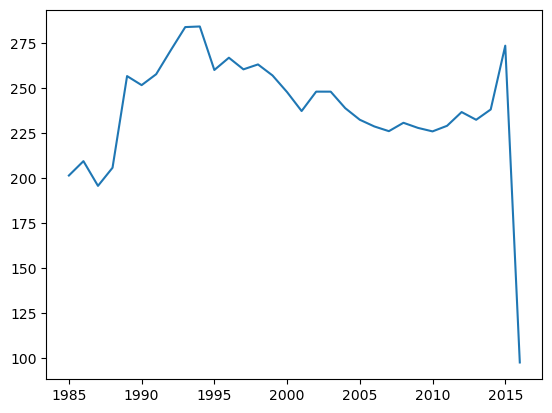

In [135]:
plt.plot(df.index, df.values)
plt.show()

In [136]:


df_1=data.groupby("country")["gdp_per_capita ($)"].mean()
df_1.head()

country
Albania                 1859.045455
Antigua and Barbuda    10448.185185
Argentina               7914.096774
Armenia                 1873.919463
Aruba                  24221.642857
Name: gdp_per_capita ($), dtype: float64

Shows how the Gdp per capita increases every year. According to the plot we can see that as the GDP per capita is increasing every year, the number of suicides being committed are decreasing

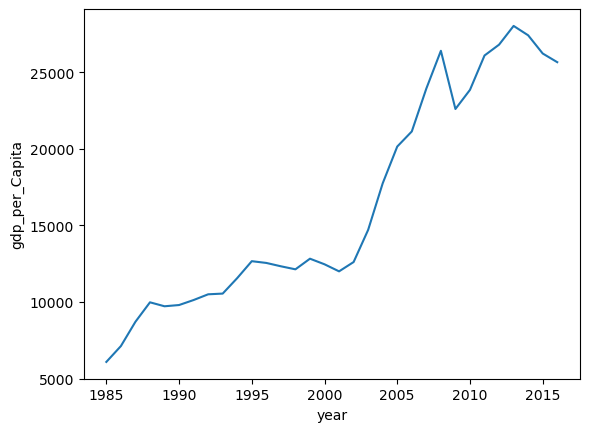

In [137]:
gdp_per_year = data.groupby("year")["gdp_per_capita ($)"].mean()
suicides_per_year = data.groupby("year")["suicides_no"].mean()

plt.plot(gdp_per_year)
plt.xlabel("year")
plt.ylabel("gdp_per_Capita")
plt.show()




Used groupby to show the total number of suicides per each generation

In [138]:
a=data.groupby("generation")["suicides_no"].sum()
a.head()

generation
Boomers            2284498
G.I. Generation     510009
Generation X       1532804
Generation Z         15906
Millenials          623459
Name: suicides_no, dtype: int64

Plot a bar chart to show the number of suicides commited according to each generation

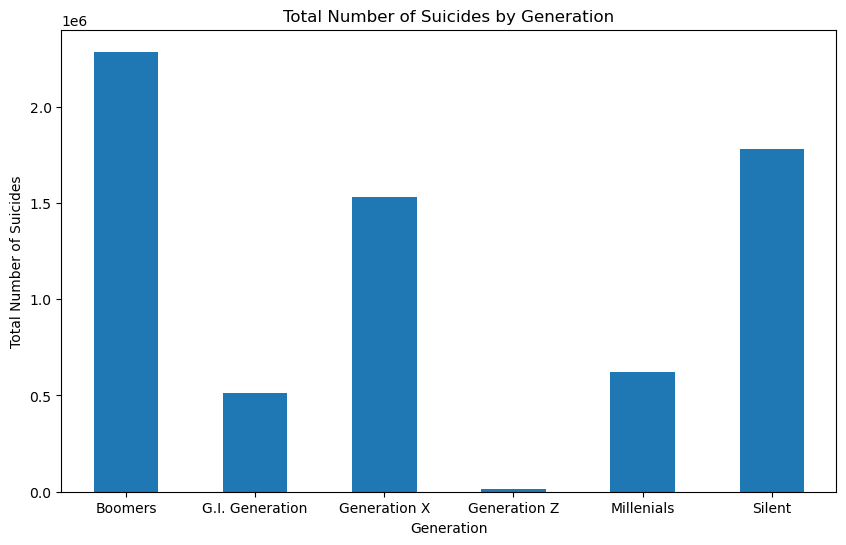

In [139]:
plt.figure(figsize=(10, 6))

# Plotting the data
a.plot(kind='bar')
plt.xlabel("Generation")
plt.ylabel("Total Number of Suicides")
plt.title("Total Number of Suicides by Generation")
plt.xticks(rotation=0)
plt.show()

MILESTONE 5

First we have to covert the [gdp_for_year ($)] into float so we can perform mathematical operations on it

In [140]:
data.columns = data.columns.str.strip()

data["gdp_for_year ($)"] = data["gdp_for_year ($)"].replace({',': ''}, regex=True).astype(float)


We first seperated all the numerical columns from the dataset and stored it into the numerical_columns variable.Then we used the skew method to find the skewness of each column in the dataset

In [141]:
numerical_columns = data.select_dtypes(include=['number'])

# Calculate skewness for all numerical columns
skewness_values = numerical_columns.skew()
print(skewness_values)

year                  -0.160241
suicides_no           10.352910
population             4.459414
suicides/100k pop      2.963414
HDI for year          -0.548664
gdp_for_year ($)       7.233755
gdp_per_capita ($)     1.963470
dtype: float64


    To visualize the skewness of each column we made a histogram for each column.

    suicides/100k pop:The histogram shows a right-skewed distribution, with most data points concentrated on the lower end (close to 0). A few values are spread across higher ranges, indicating a small number of regions or periods with exceptionally high suicide rates.
    
    population:Similar to GDP-related columns, the population distribution is right-skewed. The majority of regions have relatively low population values
    
    suicides_no:This distribution is highly skewed to the right. Most values are close to 0, showing that the majority of data points have low absolute suicide numbers. A few outliers push the tail to the right.
    
    HDI for year:The distribution is centered between 0.7 and 0.9, indicating that most regions fall within this range of Human Development Index (HDI). The histogram is slightly left-skewed, showing that higher HDI values are slightly more common.

    gdp_for_year ($):The data is heavily right-skewed, with most countries having a low GDP per capita and a few outliers with significantly higher values. This highlights economic inequality in the dataset.
    
    gdp_for_capita ($): The histogram shows a strong right-skewed distribution. Most GDP values are clustered toward the lower end, while a few very high GDP values create a long tail on the right,
    

array([[<Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'suicides_no'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'suicides/100k pop'}>,
        <Axes: title={'center': 'HDI for year'}>,
        <Axes: title={'center': 'gdp_for_year ($)'}>],
       [<Axes: title={'center': 'gdp_per_capita ($)'}>, <Axes: >,
        <Axes: >]], dtype=object)

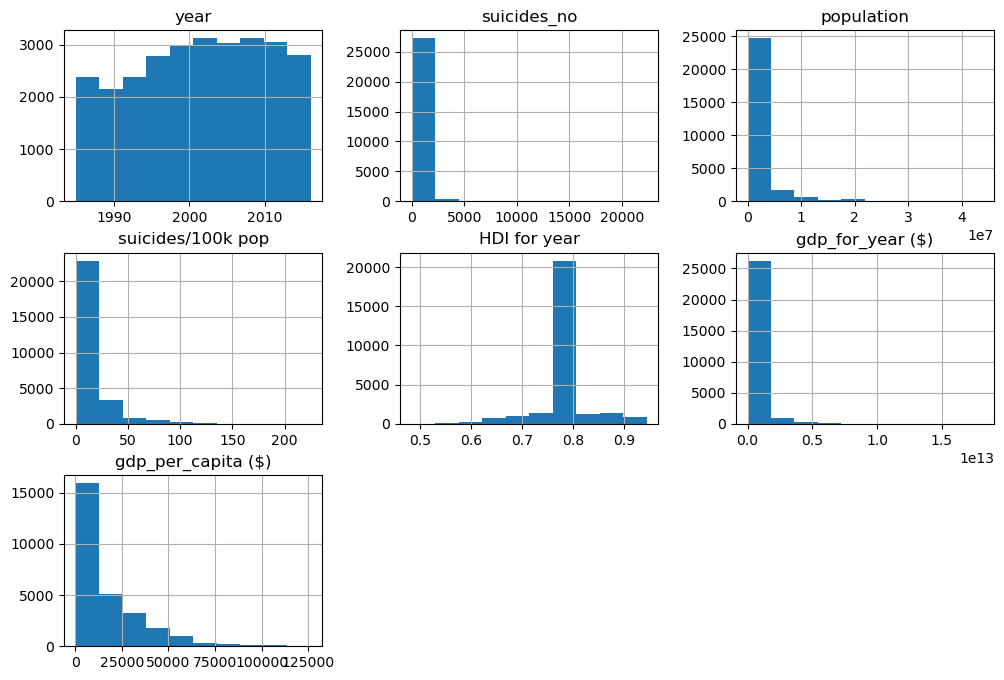

In [142]:
numerical_columns.hist(bins=10, figsize=(12, 8))


All features, except for the year and HDI for year attributes, exhibit right-skewed distributions, deviating significantly from normality. The year attribute has a relatively uniform distribution with a slight left skew, while the HDI for year attribute also shows a mild negative skew to the left.

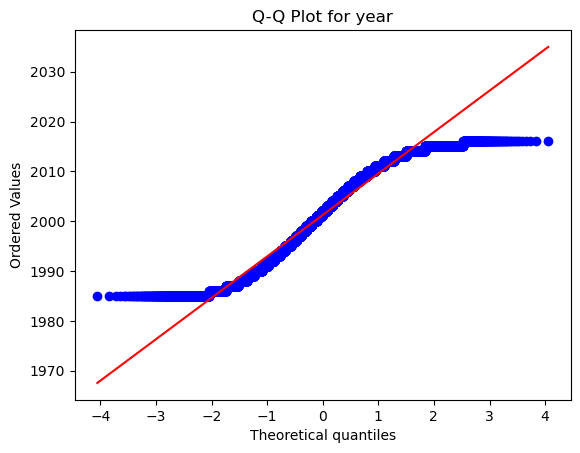

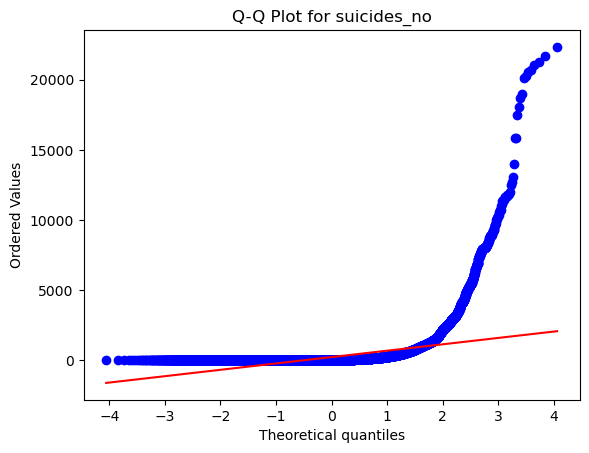

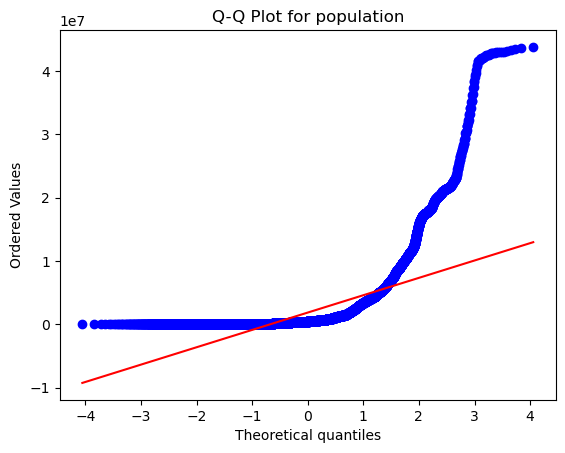

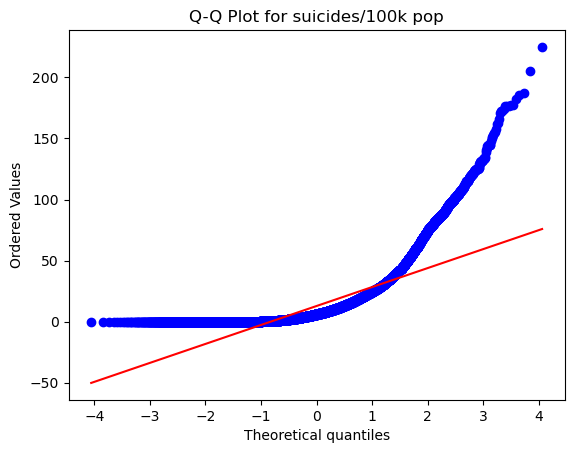

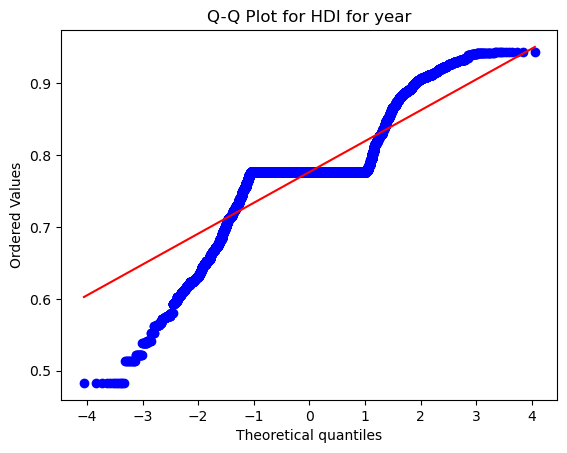

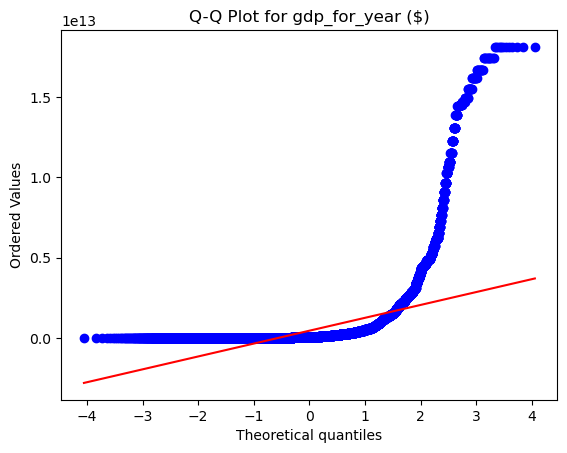

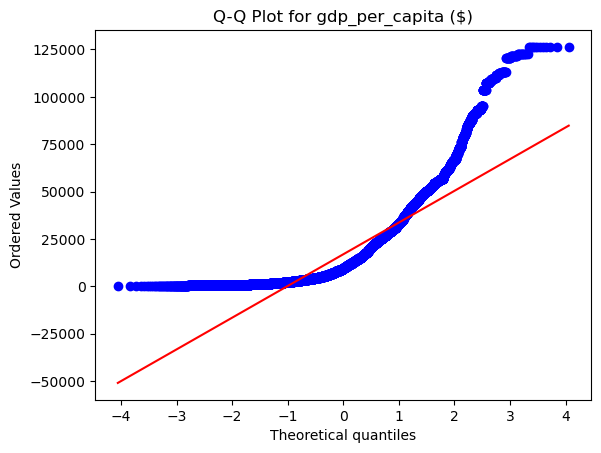

In [143]:
for col in numerical_columns:
    stats.probplot(numerical_columns[col], dist="norm", plot=plt)
    plt.title(f"Q-Q Plot for {col}")
    plt.show()

Most features, including suicides_no, population, suicides/100k pop, gdp_for_year ($), and gdp_per_capita ($), exhibit right-skewed distributions. This indicates that the majority of the data points are clustered at lower values, with a long tail of higher values. These outliers represent extreme cases that deviate significantly from the norm:

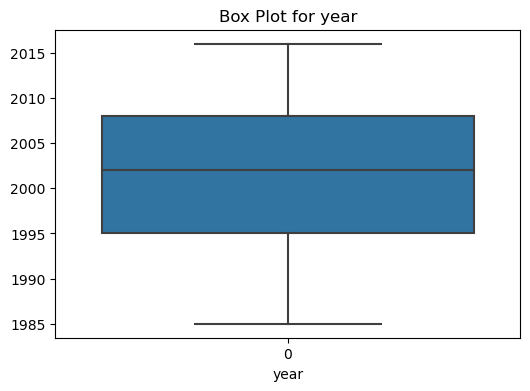

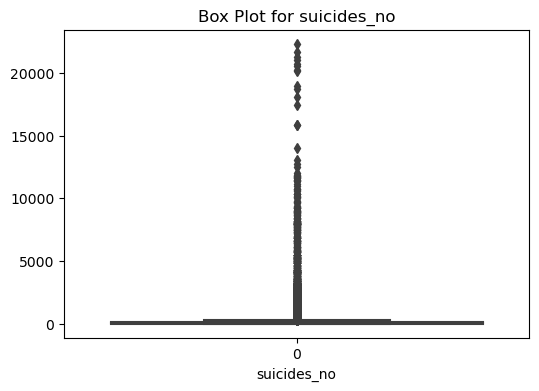

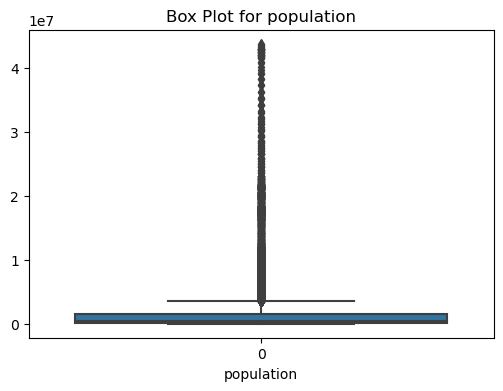

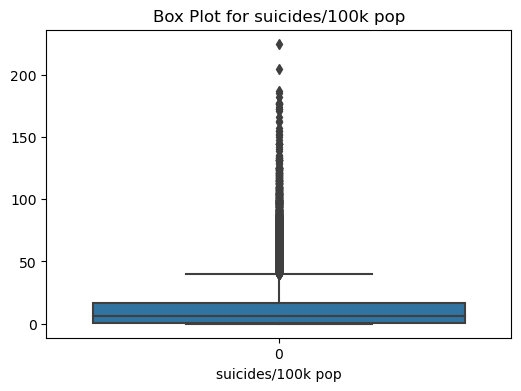

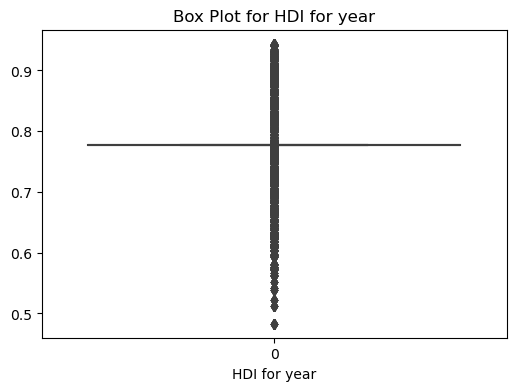

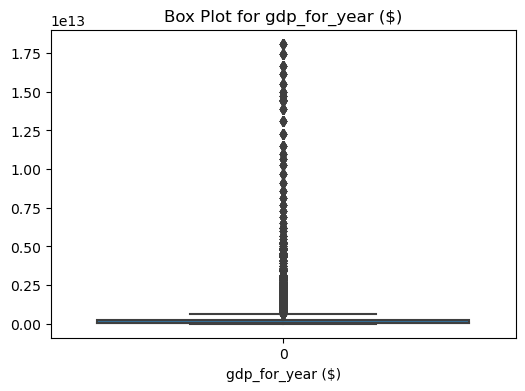

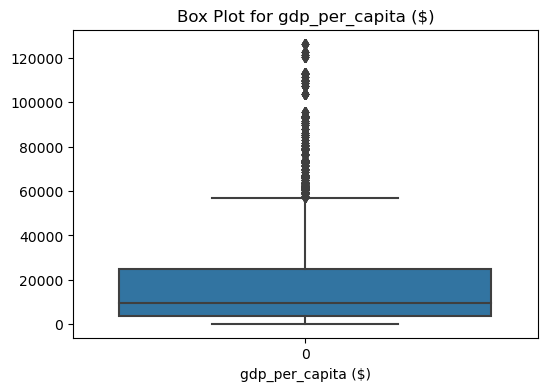

In [144]:
for col in numerical_columns.columns:
    plt.figure(figsize=(6, 4))  # Adjust figure size for each plot
    sns.boxplot(data=numerical_columns[col])
    plt.title(f'Box Plot for {col}')
    plt.xlabel(col)
    plt.show()
    

The KDE plots highlight significant disparities across the dataset. Most variables, such as suicides_no, population, gdp_for_year ($), and gdp_per_capita ($), exhibit strong right-skewed distributions, with the majority of values clustered at lower ranges and a few extreme outliers representing highly populated or economically developed regions. In contrast, HDI for year shows a stable and concentrated distribution around 0.8

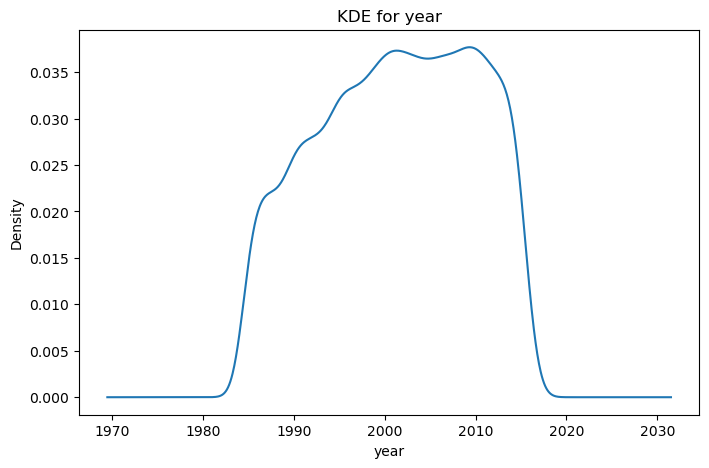

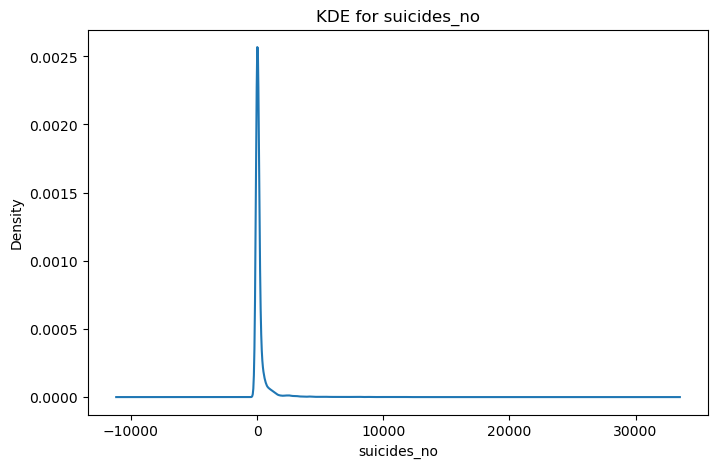

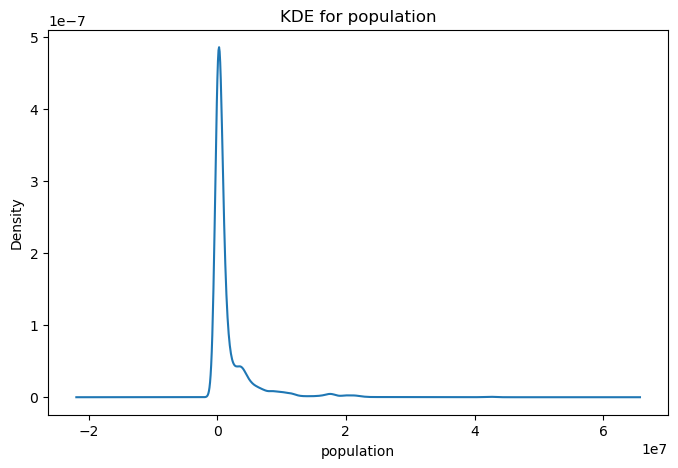

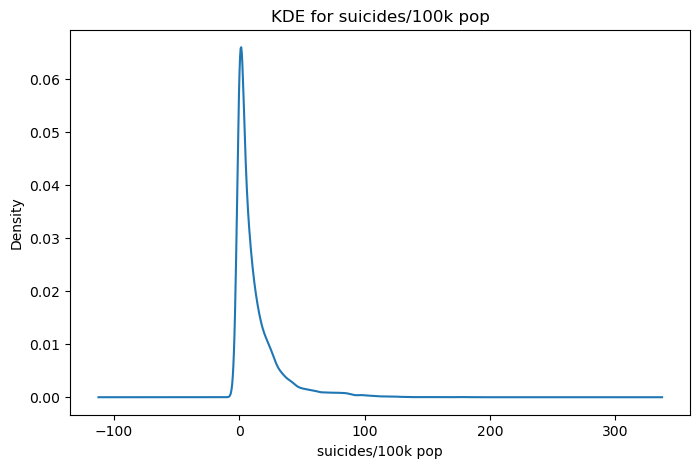

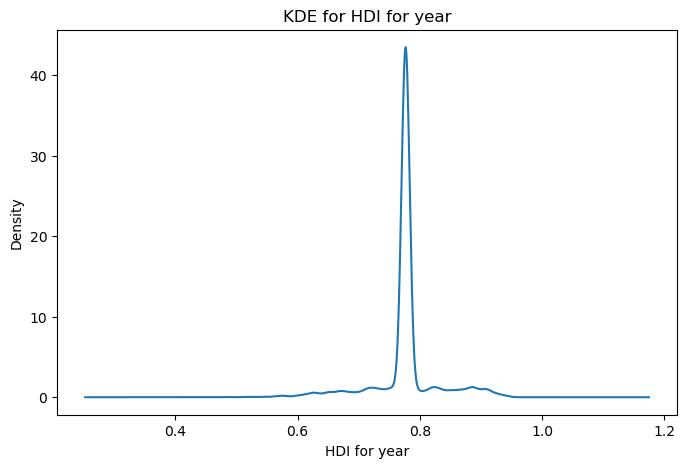

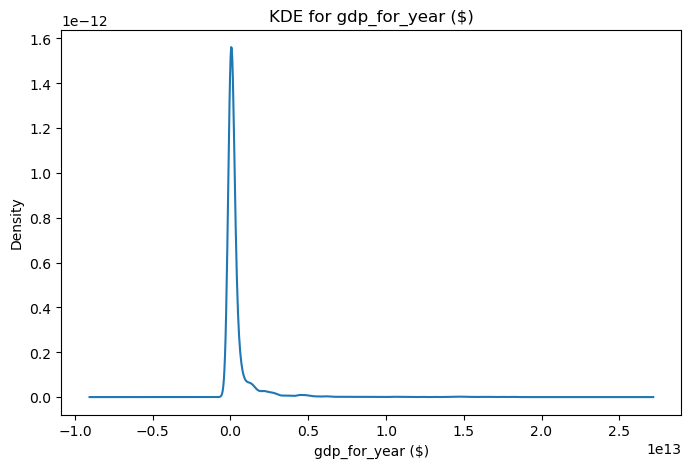

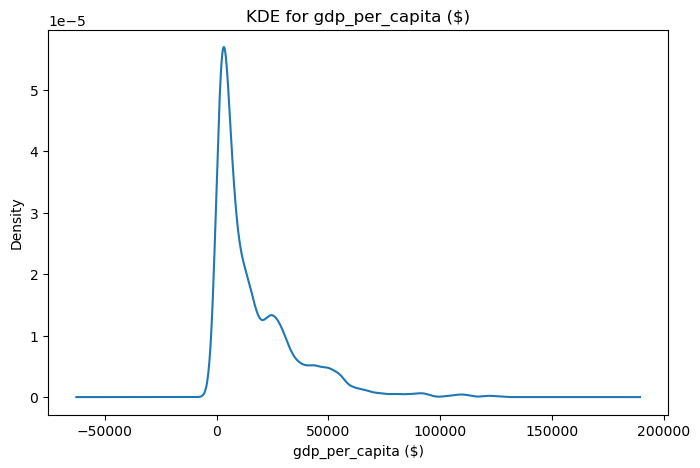

In [145]:
for column in numerical_columns.columns:
    plt.figure(figsize=(8, 5))
    numerical_columns[column].plot(kind='kde', title=f'KDE for {column}')
    plt.xlabel(column)
    plt.ylabel('Density') 
    plt.show()

Transforming Skewed Data

In [146]:
 skewed_dataframe=np.log1p(numerical_columns)
 skewed_dataframe

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_for_year ($),gdp_per_capita ($)
0,7.594884,3.091042,12.653642,2.042518,0.574702,21.491810,6.680855
1,7.594884,2.833213,12.637858,1.822935,0.574702,21.491810,6.680855
2,7.594884,2.708050,12.576605,1.763017,0.574702,21.491810,6.680855
3,7.594884,0.693147,9.989711,1.720979,0.574702,21.491810,6.680855
4,7.594884,2.302585,12.521981,1.453953,0.574702,21.491810,6.680855
...,...,...,...,...,...,...,...
27815,7.608374,4.682131,15.102215,1.376244,0.515813,24.867465,7.745003
27816,7.608374,2.302585,12.761296,1.275363,0.515813,24.867465,7.745003
27817,7.608374,4.110874,14.831523,1.153732,0.515813,24.867465,7.745003
27818,7.608374,3.806662,14.783103,0.982078,0.515813,24.867465,7.745003


I used the skewed data to define the X and Y variables that will be used to make the predictive model

In [147]:
x=skewed_dataframe.drop(["suicides_no"],axis=1)
y=skewed_dataframe["suicides_no"]

Split the data into train and test data.

In [148]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.3)


I used the DecisionTreeRegressor as the model to predict suicides_no, training it on the dataset and evaluating its performance using regression metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), and R² Score

In [149]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score, classification_report


Dtr=DecisionTreeRegressor()
Dtr.fit(x_train,y_train)
y_pred=Dtr.predict(x_test)

To evaluate the model and check if the model is giving accurate predictions or not so i did mean_squared error which gave me a value of    0.002 which means that, on average, the squared difference between the predicted values and the actual values in your regression model is 0.002 which shows the model is highly accurate. The r_square value of the model is 0.99 which means that only 1% of the variance is not explained by the model. Also the Rmse of the model is 0.05 which shows high accuracy for the model

In [150]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse= np.sqrt(mse)
print(f"the mean square error for the model is {mse}")
print(f"the r_square valuse for the model is {r2}")
print(f"the root mean square value of the model is {rmse}")


the mean square error for the model is 0.0028671987644350496
the r_square valuse for the model is 0.9994387587107587
the root mean square value of the model is 0.05354623016081571


The cross-validation results indicate a range of negative mean squared errors (MSE) from about -0.00225 to -0.0362, showing that the model works well in most folds, with modest mistakes in predicting the target variable. The lower MSE values suggest that the model captures the patterns in the data successfully, but the slightly higher MSE in one fold indicates some variability in performance, maybe due to unequal data distribution or overfitting to specific folds.

In [151]:
cross_val_scores = cross_val_score(Dtr, x, y, cv=10, scoring='neg_mean_squared_error')
cross_val_scores

array([-0.00219021, -0.00940292, -0.00254478, -0.0037837 , -0.00705814,
       -0.00652341, -0.00471128, -0.01472273, -0.00749112, -0.03641387])

In [152]:
skewed_dataframe['year'] = data["year"]


Over here we are predicting the number of deaths in a single year using the time series analysis. We are using the arima model which will be trained on the given data. First we have to change the format of the year column so it can work with the arima model. We used groupyby to group together the year nad suicide_no columns.

In [153]:
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
skewed_dataframe['year'] = pd.to_datetime(skewed_dataframe['year'], format='%Y')

time_series = skewed_dataframe.groupby('year')['suicides_no'].sum()
time_series = time_series.sort_index()
time_series

year
1985-01-01    1665.005748
1986-01-01    1718.790413
1987-01-01    1919.028481
1988-01-01    1849.344980
1989-01-01    2013.255188
1990-01-01    2542.350268
1991-01-01    2559.093380
1992-01-01    2687.351474
1993-01-01    2667.455934
1994-01-01    2739.432619
1995-01-01    3082.816654
1996-01-01    3139.194831
1997-01-01    3128.591180
1998-01-01    3202.642536
1999-01-01    3294.769009
2000-01-01    3266.893704
2001-01-01    3277.776808
2002-01-01    3304.576387
2003-01-01    3286.553907
2004-01-01    3112.045793
2005-01-01    3048.200149
2006-01-01    3099.064736
2007-01-01    3200.251955
2008-01-01    3199.013565
2009-01-01    3320.541556
2010-01-01    3310.716125
2011-01-01    3235.457196
2012-01-01    3165.966437
2013-01-01    3112.944437
2014-01-01    3109.363573
2015-01-01    2601.472169
2016-01-01     513.540847
Name: suicides_no, dtype: float64


We utilized the auto_arima function to fit the model and leveraged the summary() method to evaluate its performance. This method not only provides key insights into the model's accuracy but also identifies the optimal values for P, D, and Q, which represent the autoregressive, differencing, and moving average components. These values are critical in building the most effective ARIMA model by optimizing its ability to capture the underlying patterns in the data.

In [154]:
local=auto_arima(time_series, trace=True, error_action='ignore', suppress_warnings=True,stepwise=True)
local.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.14 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=509.159, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=482.486, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=490.572, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=602.321, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=476.275, Time=0.09 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=476.976, Time=0.15 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=478.635, Time=0.11 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=476.327, Time=0.05 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.14 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=475.472, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=482.404, Time=0.02 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=476.166, Time=0.06 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=475.052, Time=0.06 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=475.660, Time

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   32
Model:               SARIMAX(2, 0, 1)   Log Likelihood                -233.526
Date:                Sun, 08 Dec 2024   AIC                            475.052
Time:                        21:56:56   BIC                            480.915
Sample:                    01-01-1985   HQIC                           476.995
                         - 01-01-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.5733      0.496      3.172      0.002       0.601       2.546
ar.L2         -0.6121      0.513     -1.194      0.233      -1.617       0.393
ma.L1          0.6065      0.372      1.630      0.103      -0.123       1.336
sigma2      1.059e+05   3.42e+04      3.098      0.002    3.89e+04    1.73e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):               150.57
Prob(Q):                              0.89   Prob(JB):                         0.00
Heteroskedasticity (H):               2.57   Skew:                            -2.65
Prob(H) (two-sided):                  0.13   Kurtosis:                        12.21
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

We fit the data in the ARIMA model

In [164]:
model = ARIMA(time_series, order=(2,0,1))  
arima_result = model.fit()
arima_result.summary()

c:\Users\asadj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\asadj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\asadj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\asadj\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\asadj\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimi

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            suicides_no   No. Observations:                   32
Model:                 ARIMA(2, 0, 1)   Log Likelihood                -232.857
Date:                Sun, 08 Dec 2024   AIC                            475.713
Time:                        22:01:43   BIC                            483.042
Sample:                    01-01-1985   HQIC                           478.142
                         - 01-01-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2167.5055   1744.172      1.243      0.214   -1251.008    5586.019
ar.L1          1.4685      0.524      2.805      0.005       0.442       2.495
ar.L2         -0.6022      0.535     -1.125      0.261      -1.651       0.447
ma.L1          0.6145      0.394      1.560      0.119      -0.158       1.387
sigma2      1.054e+05   3.63e+04      2.904      0.004    3.42e+04    1.77e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):               176.95
Prob(Q):                              0.80   Prob(JB):                         0.00
Heteroskedasticity (H):               3.24   Skew:                            -2.82
Prob(H) (two-sided):                  0.06   Kurtosis:                        13.04
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

To check how the accurate the arima model was we plotted a line graph that showed the actual number of suicide in a single year and the predicted suicide by ARIMA model. As we can see that both the line graphs are very similar to each other which is a good indication that the Arima model is performing well.

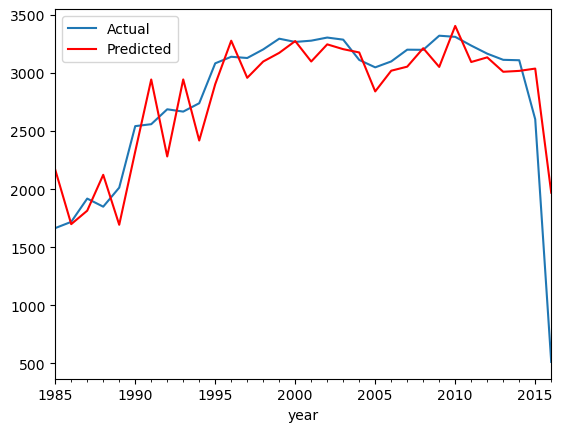

In [165]:
in_sample_pred = arima_result.predict(start=time_series.index[0], end=time_series.index[-1])
time_series.plot(label='Actual')
in_sample_pred.plot(label='Predicted', color='red')
plt.legend()


The model shows high values for the mean squared error (MSE) because it predicts the total number of suicides each year. Since MSE squares the deviations, even small prediction errors can result in a high value due to the scale of the target variable. However, the mean absolute error (MAE) of 218 is relatively low, indicating that, on average, the model's predictions deviate by only 218 suicides from the actual values. This suggests that the model performs well overall, accurately capturing the trend and variability in the data, even if the MSE appears large due to its sensitivity to larger deviations.

In [170]:

mae = mean_absolute_error(time_series, in_sample_pred)
mse = mean_squared_error(time_series, in_sample_pred)
rmse = np.sqrt(mse)
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Mean Squared Error: {rmse}")


Mean Absolute Error: 218.8122186494426
Mean Squared Error: 113621.54089952225
Mean Squared Error: 337.07794484291355


The residuals figure shows that the model performs well in general, with the majority of residuals neatly packed around zero, indicating minimal prediction bias. However, there are a few major outliers, including one with a residual approaching -1500, indicating that the model underestimated the real value. These outliers could be anomalies or edge instances that the model struggles to capture. While the residuals appear to be randomly distributed with no clear patterns, the presence of outliers emphasizes the importance of further investigating these spots to discover whether they represent data anomalies or areas where the model may be improved.

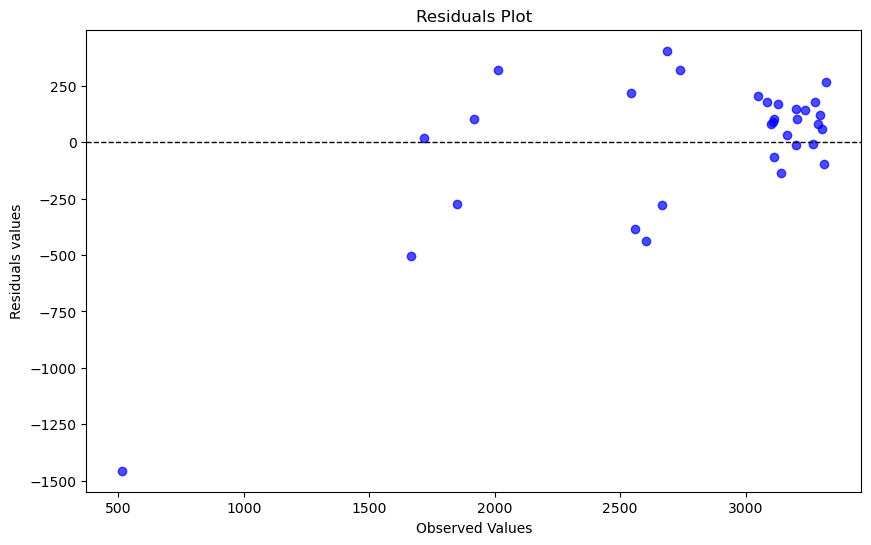

In [169]:
residuals = time_series.values - in_sample_pred.values 
plt.figure(figsize=(10, 6))
plt.scatter(time_series, residuals, alpha=0.7, color='blue', label='Residuals') 
plt.axhline(0, color='black', linestyle='--', linewidth=1, label='Zero Residual Line') 
plt.xlabel('Observed Values')
plt.ylabel('Residuals values')
plt.title('Residuals Plot')
plt.show()